In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv('data_2.csv')

In [60]:
print(data.shape)

(9564, 141)


In [61]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Columns: 141 entries, rowid to koi_dikco_msky_err
dtypes: float64(118), int64(7), object(16)
memory usage: 10.3+ MB
None


In [62]:
#for more clarity renaming the columns that we need
data = data.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod',
'koi_period_err1':'OrbitalPeriodUpperUnc',
'koi_period_err2':'OrbitalPeriodLowerUnc',
'koi_time0bk':'TransitEpoch',
'koi_time0bk_err1':'TransitEpochUpperUnc',
'koi_time0bk_err2':'TransitEpochLowerUnc',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration',
'koi_duration_err1':'TransitDurationUpperUnc',
'koi_duration_err2':'TransitDurationLowerUnc',
'koi_depth':'TransitDepth',
'koi_depth_err1':'TransitDepthUpperUnc',
'koi_depth_err2':'TransitDepthLowerUnc',
'koi_prad':'PlanetaryRadius',
'koi_prad_err1':'PlanetaryRadiusUpperUnc',
'koi_prad_err2':'PlanetaryRadiusLowerUnc',
'koi_teq':'EquilibriumTemperature',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc',
'koi_insol':'InsolationFlux',
'koi_insol_err1':'InsolationFluxUpperUnc',
'koi_insol_err2':'InsolationFluxLowerUnc',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc',
'koi_slogg':'StellarSurfaceGravity',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc',
'koi_srad':'StellarRadius',
'koi_srad_err1':'StellarRadiusUpperUnc',
'koi_srad_err2':'StellarRadiusLowerUnc',
'ra':'RA',
'dec':'Dec',
'koi_kepmag':'Kepler-band'
})

In [63]:
data.head()

,rowid,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,koi_vet_stat,koi_vet_date,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,16-08-2018,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,16-08-2018,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,16-08-2018,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,16-08-2018,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,16-08-2018,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [64]:
selected = data
print(selected.shape)
selected = selected.loc[:,selected.columns.intersection(['ExoplanetArchiveDisposition','DispositionUsingKeplerData','OrbitalPeriod','OrbitalPeriodUpperUnc','OrbitalPeriodLowerUnc','TransitEpoch','TransitEpochUpperUnc',
                                                        'TransitEpochLowerUnc','ImpactParamete','ImpactParameterUpperUnc','ImpactParameterLowerUnc',
                                                        'TransitDuration','TransitDurationUpperUnc','TransitDurationLowerUnc','TransitDepth','TransitDepthLowerUnc','TransitDepthUpperUnc',
                                                        'PlanetaryRadius','PlanetaryRadiusUpperUnc','PlanetaryRadiusLowerUnc','EquilibriumTemperature','InsolationFlux','InsolationFluxUpperUnc',
                                                        'InsolationFluxLowerUnc','TransitSignal-to-Nois','TCEPlanetNumbe','StellarEffectiveTemperature','StellarEffectiveTemperatureUpperUnc',
                                                        'StellarEffectiveTemperatureLowerUnc','StellarSurfaceGravity','StellarSurfaceGravityUpperUnc','StellarSurfaceGravityLowerUnc','StellarRadius',
                                                        'StellarRadiusUpperUnc','StellarRadiusLowerUnc','RA','Dec','Kepler-band'])]
print(selected.shape)
selected.head()

(9564, 141)
(9564, 38)


,ExoplanetArchiveDisposition,DispositionUsingKeplerData,OrbitalPeriod,OrbitalPeriodUpperUnc,OrbitalPeriodLowerUnc,TransitEpoch,TransitEpochUpperUnc,TransitEpochLowerUnc,ImpactParamete,ImpactParameterUpperUnc,...,StellarEffectiveTemperatureLowerUnc,StellarSurfaceGravity,StellarSurfaceGravityUpperUnc,StellarSurfaceGravityLowerUnc,StellarRadius,StellarRadiusUpperUnc,StellarRadiusLowerUnc,RA,Dec,Kepler-band
0,CONFIRMED,CANDIDATE,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,CANDIDATE,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [65]:
#target variables
selected['ExoplanetCandidate'] = selected['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
selected['ExoplanetConfirmed'] = selected['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )
#selected.drop(columns=['DispositionUsingKeplerData','ExoplanetArchiveDisposition'],inplace=True)
print(selected.shape)
selected.head()


(9564, 40)


,ExoplanetArchiveDisposition,DispositionUsingKeplerData,OrbitalPeriod,OrbitalPeriodUpperUnc,OrbitalPeriodLowerUnc,TransitEpoch,TransitEpochUpperUnc,TransitEpochLowerUnc,ImpactParamete,ImpactParameterUpperUnc,...,StellarSurfaceGravityUpperUnc,StellarSurfaceGravityLowerUnc,StellarRadius,StellarRadiusUpperUnc,StellarRadiusLowerUnc,RA,Dec,Kepler-band,ExoplanetCandidate,ExoplanetConfirmed
0,CONFIRMED,CANDIDATE,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,CONFIRMED,CANDIDATE,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,CANDIDATE,CANDIDATE,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,FALSE POSITIVE,FALSE POSITIVE,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,...,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,CONFIRMED,CANDIDATE,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


In [66]:
selected.drop(columns=['DispositionUsingKeplerData','ExoplanetArchiveDisposition'],inplace=True)

In [67]:
#checking for empty values
selected.isna().any()

OrbitalPeriod                          False
OrbitalPeriodUpperUnc                   True
OrbitalPeriodLowerUnc                   True
TransitEpoch                           False
TransitEpochUpperUnc                    True
TransitEpochLowerUnc                    True
ImpactParamete                          True
ImpactParameterUpperUnc                 True
ImpactParameterLowerUnc                 True
TransitDuration                        False
TransitDurationUpperUnc                 True
TransitDurationLowerUnc                 True
TransitDepth                            True
TransitDepthUpperUnc                    True
TransitDepthLowerUnc                    True
PlanetaryRadius                         True
PlanetaryRadiusUpperUnc                 True
PlanetaryRadiusLowerUnc                 True
EquilibriumTemperature                  True
InsolationFlux                          True
InsolationFluxUpperUnc                  True
InsolationFluxLowerUnc                  True
TransitSig

In [68]:
selected.isna().sum()

OrbitalPeriod                            0
OrbitalPeriodUpperUnc                  454
OrbitalPeriodLowerUnc                  454
TransitEpoch                             0
TransitEpochUpperUnc                   454
TransitEpochLowerUnc                   454
ImpactParamete                         363
ImpactParameterUpperUnc                454
ImpactParameterLowerUnc                454
TransitDuration                          0
TransitDurationUpperUnc                454
TransitDurationLowerUnc                454
TransitDepth                           363
TransitDepthUpperUnc                   454
TransitDepthLowerUnc                   454
PlanetaryRadius                        363
PlanetaryRadiusUpperUnc                363
PlanetaryRadiusLowerUnc                363
EquilibriumTemperature                 363
InsolationFlux                         321
InsolationFluxUpperUnc                 321
InsolationFluxLowerUnc                 321
TransitSignal-to-Nois                  363
TCEPlanetNu

In [69]:
selected.dtypes

OrbitalPeriod                          float64
OrbitalPeriodUpperUnc                  float64
OrbitalPeriodLowerUnc                  float64
TransitEpoch                           float64
TransitEpochUpperUnc                   float64
TransitEpochLowerUnc                   float64
ImpactParamete                         float64
ImpactParameterUpperUnc                float64
ImpactParameterLowerUnc                float64
TransitDuration                        float64
TransitDurationUpperUnc                float64
TransitDurationLowerUnc                float64
TransitDepth                           float64
TransitDepthUpperUnc                   float64
TransitDepthLowerUnc                   float64
PlanetaryRadius                        float64
PlanetaryRadiusUpperUnc                float64
PlanetaryRadiusLowerUnc                float64
EquilibriumTemperature                 float64
InsolationFlux                         float64
InsolationFluxUpperUnc                 float64
InsolationFlu

In [70]:
selected1=selected.dropna(axis=0)
print(selected1)

      OrbitalPeriod  OrbitalPeriodUpperUnc  OrbitalPeriodLowerUnc  \
0          9.488036           2.780000e-05          -2.780000e-05   
1         54.418383           2.480000e-04          -2.480000e-04   
2         19.899140           1.490000e-05          -1.490000e-05   
3          1.736952           2.630000e-07          -2.630000e-07   
4          2.525592           3.760000e-06          -3.760000e-06   
...             ...                    ...                    ...   
9559       0.527699           1.160000e-07          -1.160000e-07   
9560       1.739849           1.780000e-05          -1.780000e-05   
9561       0.681402           2.430000e-06          -2.430000e-06   
9562     333.486169           4.240000e-03          -4.240000e-03   
9563       4.856035           6.360000e-05          -6.360000e-05   

      TransitEpoch  TransitEpochUpperUnc  TransitEpochLowerUnc  \
0       170.538750              0.002160             -0.002160   
1       162.513840              0.00352

In [71]:
selected1.head()

,OrbitalPeriod,OrbitalPeriodUpperUnc,OrbitalPeriodLowerUnc,TransitEpoch,TransitEpochUpperUnc,TransitEpochLowerUnc,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration,...,StellarSurfaceGravityUpperUnc,StellarSurfaceGravityLowerUnc,StellarRadius,StellarRadiusUpperUnc,StellarRadiusLowerUnc,RA,Dec,Kepler-band,ExoplanetCandidate,ExoplanetConfirmed
0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,...,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


<function matplotlib.pyplot.show(close=None, block=None)>

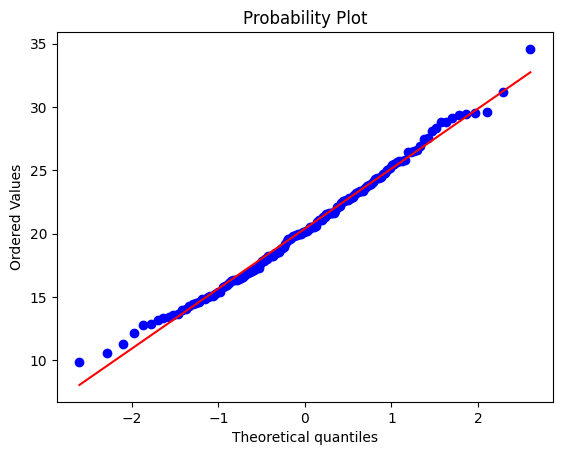

In [72]:
import pylab
import scipy.stats as stats
measurements=np.random.normal(loc=20,scale=5,size=150)
stats.probplot(measurements,dist="norm",plot=pylab)
pylab.show

In [73]:
selected1.describe()

,OrbitalPeriod,OrbitalPeriodUpperUnc,OrbitalPeriodLowerUnc,TransitEpoch,TransitEpochUpperUnc,TransitEpochLowerUnc,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration,...,StellarSurfaceGravityUpperUnc,StellarSurfaceGravityLowerUnc,StellarRadius,StellarRadiusUpperUnc,StellarRadiusLowerUnc,RA,Dec,Kepler-band,ExoplanetCandidate,ExoplanetConfirmed
count,8744.000000,8.744000e+03,8.744000e+03,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,...,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000
mean,56.080618,1.840001e-03,-1.840001e-03,164.563271,0.009300,-0.009300,0.718315,1.972656,-0.330185,5.521409,...,0.120733,-0.140411,1.704566,0.352884,-0.379933,292.075061,43.828259,14.273969,0.517383,0.785682
std,117.385280,7.280915e-03,7.280915e-03,66.476457,0.021662,0.021662,3.176618,9.464462,1.227048,6.318934,...,0.132813,0.082936,5.682429,0.906364,1.810943,4.772918,3.599786,1.343509,0.499726,0.838863
min,0.259820,1.100000e-08,-1.570000e-01,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.167000,...,0.000000,-1.207000,0.109000,0.000000,-103.825000,279.852720,36.577381,6.966000,0.000000,0.000000
25%,2.667824,5.290000e-06,-2.460000e-04,132.729408,0.001200,-0.010000,0.197000,0.040000,-0.447000,2.437750,...,0.043000,-0.195000,0.826000,0.125750,-0.247000,288.670237,40.805911,13.474000,0.000000,0.000000
50%,8.970985,3.320000e-05,-3.320000e-05,136.910235,0.004020,-0.004020,0.540500,0.192000,-0.207000,3.778935,...,0.070000,-0.127000,0.997000,0.246000,-0.111000,292.285005,43.703989,14.534000,1.000000,1.000000
75%,34.190033,2.460000e-04,-5.290000e-06,169.975942,0.010000,-0.001200,0.889000,0.378850,-0.045000,6.172000,...,0.149000,-0.087000,1.346250,0.356000,-0.069000,295.900510,46.722135,15.318250,1.000000,2.000000
max,1071.232624,1.570000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,...,1.472000,0.000000,180.013000,33.091000,0.000000,301.720760,52.336010,19.065000,1.000000,2.000000


(array([ 10.,  37., 103., 223., 286., 224.,  90.,  24.,   1.,   2.]),
 array([ 69.4623562 ,  76.47472328,  83.48709036,  90.49945745,
         97.51182453, 104.52419162, 111.5365587 , 118.54892579,
        125.56129287, 132.57365996, 139.58602704]),
 <BarContainer object of 10 artists>)

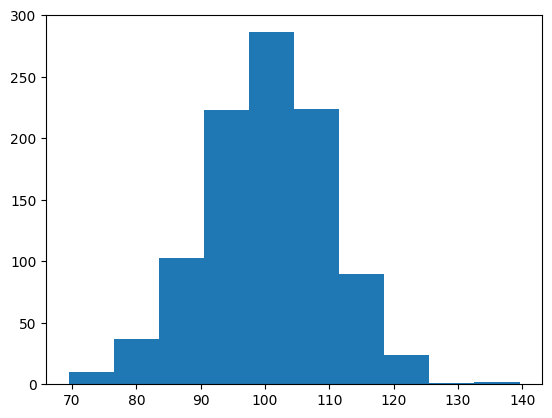

In [45]:
plt.hist(selected1)

<AxesSubplot:>

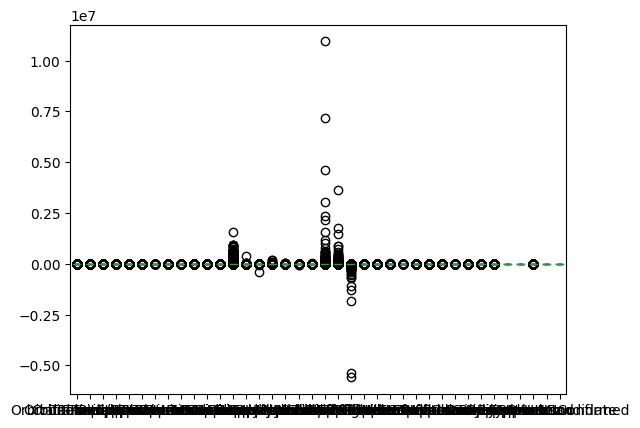

In [74]:
selected1.plot(kind='box')